## Explore data

In [18]:
import pandas as pd

In [19]:
job_change = pd.read_csv('data/aug_train.csv')

In [20]:
job_change.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [21]:
job_change["target"].unique()

array([1., 0.])

In [45]:
job_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [22]:
job_change.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [23]:
import matplotlib.pyplot as plt

In [24]:
import matplotlib as mpl

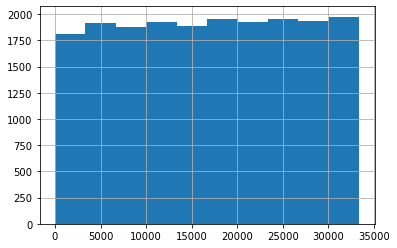

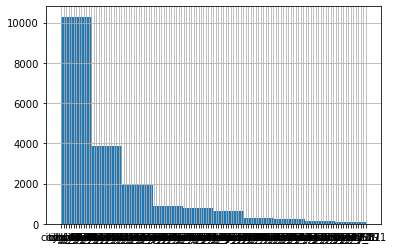

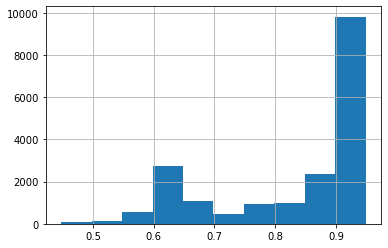

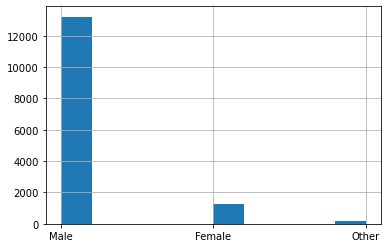

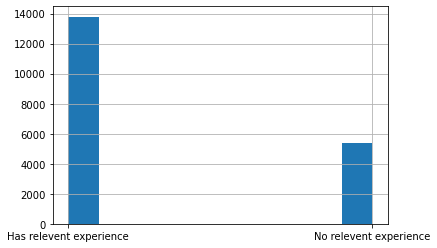

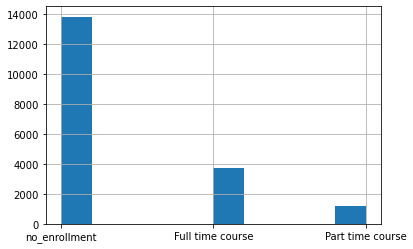

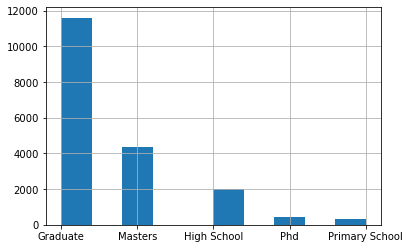

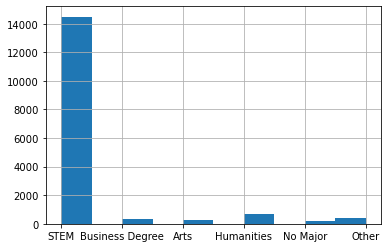

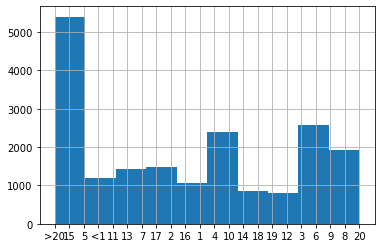

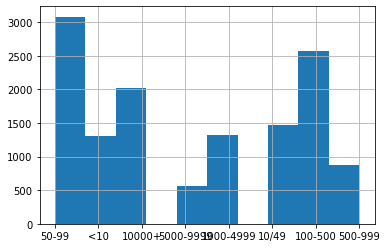

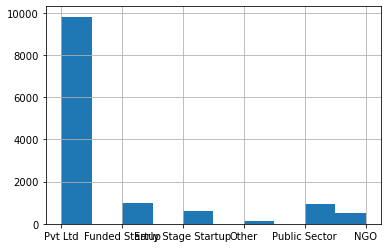

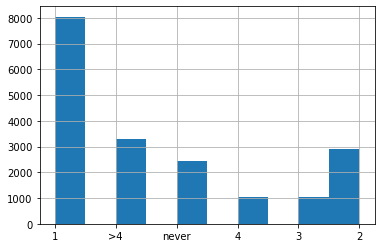

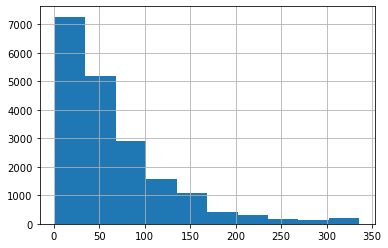

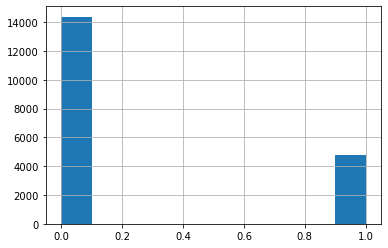

In [25]:
for attributes in job_change.columns:
    plt.figure()
    job_change[attributes].hist()

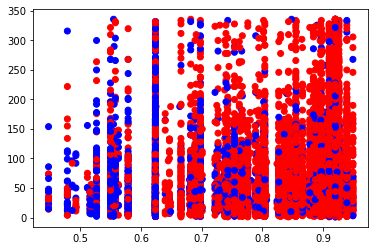

In [26]:
plt.scatter(job_change["city_development_index"], job_change["training_hours"], c=job_change["target"], cmap=mpl.colors.ListedColormap(["red", "blue"]))

In [27]:
import numpy as np

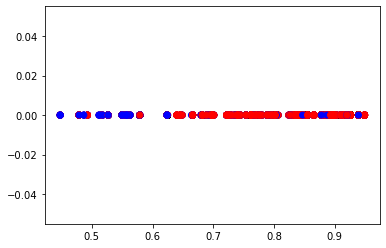

In [28]:
plt.scatter(job_change["city_development_index"], np.zeros(job_change["city_development_index"].shape), c=job_change["target"], cmap=mpl.colors.ListedColormap(["red", "blue"]))

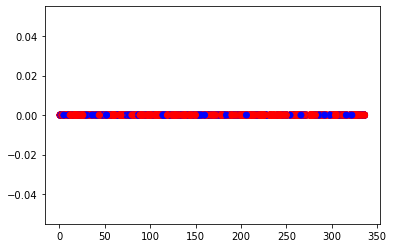

In [43]:
plt.scatter(job_change["training_hours"], np.zeros(job_change["training_hours"].shape), c=job_change["target"], cmap=mpl.colors.ListedColormap(["red", "blue"]))

# Split train test set

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in split.split(job_change, job_change["relevent_experience"]):
    strat_train_set = job_change.reindex(index=train_index)
    strat_test_set = job_change.reindex(index=test_index)

In [48]:
strat_train_set["target"].unique()

array([1., 0.])

In [50]:
strat_train_set.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6578,22505,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Pvt Ltd,2,47,1.0
2189,14580,city_28,0.939,Other,No relevent experience,Full time course,High School,NaN,3,100-500,Pvt Ltd,3,17,0.0
575,24981,city_45,0.890,NaN,Has relevent experience,no_enrollment,Graduate,STEM,9,50-99,Pvt Ltd,NaN,62,0.0
16167,495,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,5000-9999,Pvt Ltd,1,31,0.0
11764,4883,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,16,0.0


In [51]:
strat_test_set.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
14215,6188,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,500-999,Pvt Ltd,1,72,0.0
5963,2387,city_67,0.855,Male,Has relevent experience,NaN,Graduate,STEM,14,50-99,Pvt Ltd,2,27,0.0
15724,12279,city_160,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,3,50-99,NaN,2,28,0.0
4423,29267,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,90,0.0
13675,7332,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,NaN,NaN,1,14,0.0


In [52]:
print(len(strat_train_set))
print(len(strat_test_set))

11494
7664


In [53]:
strat_train_set.to_csv("Data/train.csv")

In [54]:
strat_test_set.to_csv("Data/test.csv")